## 어쩌고
- iris 데이터 종 예측

In [6]:
import seaborn as sns # iris 데이터
import pandas as pd # One-Hot Encoding
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [19]:
# 1. 데이터 생성 및 전처리
iris = sns.load_dataset('iris')

# 독립변수와 종속변수 분리
iris_X = iris.iloc[:, :-1].to_numpy()
iris_y = iris.iloc[:, -1]
iris_Y = pd.get_dummies(iris_y).values
# iris_Y[::50]
# Train:Test = 8:2
X_train, X_test, Y_train, Y_test = train_test_split(iris_X,
                                                    iris_Y,
                                                    test_size = .2,
                                                    stratify = iris_Y, # 층화추출
                                                    random_state = 4)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120, 3), (30, 4), (30, 3))

In [21]:
pd.Series(np.argmax(Y_train, axis = 1)).value_counts()

0    40
1    40
2    40
dtype: int64

In [22]:
pd.Series(np.argmax(Y_test, axis = 1)).value_counts()

1    10
2    10
0    10
dtype: int64

In [39]:
# 2. 모델 구성 (입력4, 출력3)
model = Sequential()
model.add(Dense(units = 60, 
                input_dim = 4,
                activation = 'relu'))
model.add(Dense(units = 50, 
                activation = 'relu'))
model.add(Dense(units = 30, 
                activation = 'relu'))
model.add(Dense(units = 3, 
                activation = 'softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 60)                300       
                                                                 
 dense_14 (Dense)            (None, 50)                3050      
                                                                 
 dense_15 (Dense)            (None, 30)                1530      
                                                                 
 dense_16 (Dense)            (None, 3)                 93        
                                                                 
Total params: 4,973
Trainable params: 4,973
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
# 2. 모델 구성 (입력4 - 출력3)
model = Sequential([
    Input(4, ),
    Dense(units = 60, activation = 'relu'),
    Dense(units = 128, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 16, activation = 'relu'),
    Dropout(0.1),
    Dense(units = 3,  activation = 'softmax'),
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 60)                300       
                                                                 
 dense_28 (Dense)            (None, 128)               7808      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 32)                4128      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 3)                

In [81]:
# 3. 모델학습과정
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [82]:
# 4. 학습
# Callback 추가
# epoch마다 val_accuracy(또는 val_loss) 값이 좋을 때 모델을 자동 저장
# 모델을 저장할 경로: ./model/iris-100-val0.6521.h5
import os
model_save_folder = './model/'
# model.save()는 경로 없으면 만들어주지만, Callback 함수의 경우 폴더 반드시 존재해야 함
if not os.path.exists(model_save_folder):
    os.mkkdir(model_save_folder) # model_save_folder 없으면 폴더 생성
# 조기 종료 Callback
earlyStopping = EarlyStopping(patience = 40,
                             # monitor  = 'val_lost' # 기본값
                             )
# 모델 자동 저장 Callback
file = model_save_folder + 'iris-{epoch:03d}-val{val_accuracy}.h5'
checkpoint = ModelCheckpoint(filepath = file, # 저장경로
                             monitor = 'val_accuracy', # 모니터링할 지표
                             save_best_only = True, # 지표가 개선된 경우만 저장. False면 매번 저장
                             mode = 'max', # 값이 클수록 저장. 'min'은 값이 작을수록 저장. auto
                             verbose = 1, # 저장 여부 로그 출력 (0:출력안함)
                            )
hist = model.fit(X_train, Y_train,
                 batch_size = 50, # 50마다 w, b 조정
                 epochs = 300,
                 validation_split = .2,
                 callbacks = [checkpoint, earlyStopping],
)

Epoch 1/300
1/2 [==============>...............] - ETA: 0s - loss: 1.0721 - accuracy: 0.3000
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to ./model\iris-001-val0.25.h5
2/2 [==============================] - 1s 264ms/step - loss: 1.0653 - accuracy: 0.3229 - val_loss: 1.0550 - val_accuracy: 0.2500
Epoch 2/300
1/2 [==============>...............] - ETA: 0s - loss: 1.0469 - accuracy: 0.3000
Epoch 2: val_accuracy did not improve from 0.25000
2/2 [==============================] - 0s 30ms/step - loss: 1.0782 - accuracy: 0.2604 - val_loss: 1.0096 - val_accuracy: 0.1250
Epoch 3/300
1/2 [==============>...............] - ETA: 0s - loss: 1.0134 - accuracy: 0.3800
Epoch 3: val_accuracy improved from 0.25000 to 0.54167, saving model to ./model\iris-003-val0.5416666865348816.h5
2/2 [==============================] - 0s 83ms/step - loss: 1.0342 - accuracy: 0.3333 - val_loss: 0.9660 - val_accuracy: 0.5417
Epoch 4/300
1/2 [==============>...............] - ETA: 0s - loss: 0.9849 

Epoch 30/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3684 - accuracy: 0.8800
Epoch 30: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 42ms/step - loss: 0.3337 - accuracy: 0.8646 - val_loss: 0.2035 - val_accuracy: 1.0000
Epoch 31/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3284 - accuracy: 0.8600
Epoch 31: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 48ms/step - loss: 0.3047 - accuracy: 0.8854 - val_loss: 0.1913 - val_accuracy: 1.0000
Epoch 32/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2788 - accuracy: 0.9000
Epoch 32: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 43ms/step - loss: 0.2875 - accuracy: 0.8854 - val_loss: 0.1892 - val_accuracy: 1.0000
Epoch 33/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3546 - accuracy: 0.8600
Epoch 33: val_accuracy did not improve from 1.00000
2/2 [===========================

Epoch 60/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1409 - accuracy: 0.9200
Epoch 60: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 35ms/step - loss: 0.1415 - accuracy: 0.9375 - val_loss: 0.0489 - val_accuracy: 1.0000
Epoch 61/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0704 - accuracy: 0.9800
Epoch 61: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 44ms/step - loss: 0.0991 - accuracy: 0.9583 - val_loss: 0.0386 - val_accuracy: 1.0000
Epoch 62/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1341 - accuracy: 0.9400
Epoch 62: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 41ms/step - loss: 0.1340 - accuracy: 0.9375 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 63/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0608 - accuracy: 1.0000
Epoch 63: val_accuracy did not improve from 1.00000
2/2 [===========================

Epoch 90/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1531 - accuracy: 0.9800
Epoch 90: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 53ms/step - loss: 0.0944 - accuracy: 0.9792 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 91/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1203 - accuracy: 0.9400
Epoch 91: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 73ms/step - loss: 0.0993 - accuracy: 0.9583 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 92/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0503 - accuracy: 1.0000
Epoch 92: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 38ms/step - loss: 0.0991 - accuracy: 0.9688 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 93/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1008 - accuracy: 0.9800
Epoch 93: val_accuracy did not improve from 1.00000
2/2 [===========================

Epoch 120/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0659 - accuracy: 0.9800
Epoch 120: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 44ms/step - loss: 0.1099 - accuracy: 0.9688 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 121/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0340 - accuracy: 0.9800
Epoch 121: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 50ms/step - loss: 0.0996 - accuracy: 0.9583 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 122/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0903 - accuracy: 0.9600
Epoch 122: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 87ms/step - loss: 0.1065 - accuracy: 0.9688 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 123/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0328 - accuracy: 0.9800
Epoch 123: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 150/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0302 - accuracy: 1.0000
Epoch 150: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 38ms/step - loss: 0.0811 - accuracy: 0.9792 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 151/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0660 - accuracy: 0.9800
Epoch 151: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 42ms/step - loss: 0.0864 - accuracy: 0.9688 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 152/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0797 - accuracy: 0.9800
Epoch 152: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 40ms/step - loss: 0.0969 - accuracy: 0.9688 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 153/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1419 - accuracy: 0.9600
Epoch 153: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 180/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1040 - accuracy: 0.9800
Epoch 180: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 51ms/step - loss: 0.0716 - accuracy: 0.9896 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 181/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0428 - accuracy: 1.0000
Epoch 181: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 53ms/step - loss: 0.0817 - accuracy: 0.9792 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 182/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1134 - accuracy: 0.9400
Epoch 182: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 46ms/step - loss: 0.0737 - accuracy: 0.9688 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 183/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0783 - accuracy: 0.9800
Epoch 183: val_accuracy did not improve from 1.00000
2/2 [===================

Epoch 210/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0841 - accuracy: 0.9800
Epoch 210: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 42ms/step - loss: 0.0546 - accuracy: 0.9896 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 211/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0605 - accuracy: 0.9800
Epoch 211: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 44ms/step - loss: 0.0546 - accuracy: 0.9688 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 212/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0361 - accuracy: 0.9800
Epoch 212: val_accuracy did not improve from 1.00000
2/2 [==============================] - 0s 39ms/step - loss: 0.0907 - accuracy: 0.9688 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 213/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0109 - accuracy: 1.0000
Epoch 213: val_accuracy did not improve from 1.00000
2/2 [===================

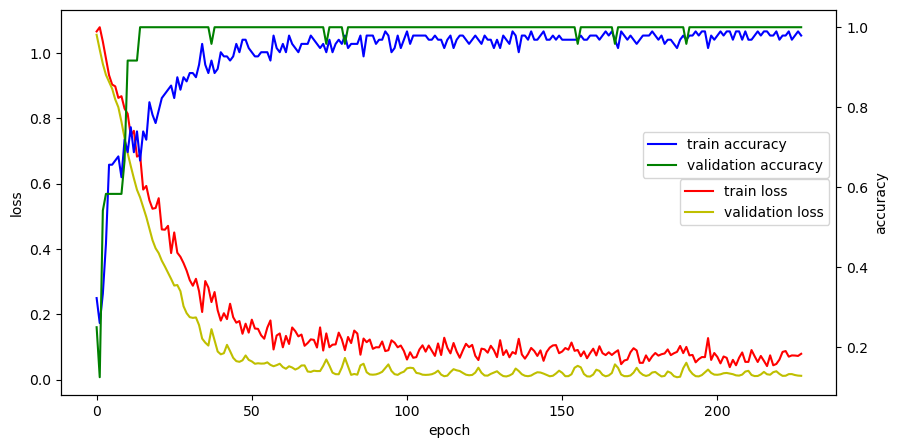

In [83]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 
             'r', 
             label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 
             'y', 
             label = 'validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 
            'b', 
            label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 
            'g', 
            label = 'validation accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.7))
plt.show()

In [84]:
# 모델 평가
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.1694 - accuracy: 0.9333


[0.1693963259458542, 0.9333333373069763]

In [85]:
# 교차표 (crosstab)
real = np.argmax(Y_test, axis = 1)
pred = np.argmax(model.predict(X_test), axis = 1)
ctab = pd.crosstab(real, pred)

ctab.columns = list(iris['species'][::50]) # ['setosa', 'versicolor', 'virginica']
ctab.columns.name = 'predict'

ctab.index = iris['species'][::50]
ctab.index.name = 'real'

ctab

1/1 [==============================] - 0s 100ms/step


predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,8,2
virginica,0,0,10


In [86]:
# 저장된 모델 중 성은이 제일 좋아보이는 것 load
from tensorflow.keras.models import load_model
model2 = load_model('model/iris-015-val1.0.h5')
model2.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 248ms/step - loss: 0.5790 - accuracy: 0.9667


[0.5789965391159058, 0.9666666388511658]

In [87]:
# 저장된 모델의 교차표
real = np.argmax(Y_test, axis = 1)
pred = np.argmax(model2.predict(X_test), axis = 1)
ctab = pd.crosstab(real, pred)

ctab.columns = list(iris['species'][::50]) # ['setosa', 'versicolor', 'virginica']
ctab.columns.name = 'predict'

ctab.index = iris['species'][::50]
ctab.index.name = 'real'

ctab

1/1 [==============================] - 0s 88ms/step


predict,setosa,versicolor,virginica
real,,,
setosa,10,0,0
versicolor,0,9,1
virginica,0,0,10


In [94]:
# 모델 사용하기(예측하기)
iris[100:101]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica


In [99]:
print(model.predict(np.array([[5.4, 3.7, 1.5, 0.2]])))
print(model.predict(np.array([[6.3, 3.4, 6.1, 2.5]])))

1/1 [==============================] - 0s 16ms/step
[0]
1/1 [==============================] - 0s 33ms/step
[[1.8295355e-04 1.2301296e-03 9.9858689e-01]]


1/1 [==============================] - 0s 23ms/step


array([[1.8295355e-04, 1.2301296e-03, 9.9858689e-01]], dtype=float32)